In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
basedir = os.getcwd()
datadir = basedir + '/Data'

# Import Data

Note: to display more rows or columns (assuming your computer can handle it), [look at this documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).

In [3]:
data = pd.read_csv(datadir + '/microbiome_data.csv', index_col = 0)
data = data.T
OTUref = pd.read_csv(datadir + '/otu_annotation.csv', index_col = 0)
patientinfo = pd.read_csv(datadir +'/sample_desc_deid.csv', index_col = 0)

print('Size\ndata: {}\nOTUref: {}\npatientinfo: {}'.format(data.shape, OTUref.shape, patientinfo.shape))

Size
data: (4357, 1896)
OTUref: (1896, 7)
patientinfo: (4402, 34)


In [4]:
patientinfo.head()

,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,Gdwithdrawal,GWwithdrawal,Delivered,GestDayDel,GestWeekdel,Labor_Initiation,Indication,PPROM,Chorioamnionitis,Endometritis,Hypertensive Disorder,Preeclampsia,Birthweight_kg,Length_at_birth,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,1,NaN,1
1000501278,AACTCGTCGATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10005,188.0,27.0,3.0,F,0.0,F,NaN,NaN,T,279.0,40.0,Augmented,0,0,0.0,0.0,Mild gestational hypertension,F,3.29,53.0,1.0,Asian-Japanese,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Specimen log not provided,run001,2,NaN,2
1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,3,NaN,3
1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,4,NaN,4
1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,5,NaN,5


In [5]:
OTUref.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUId,,,,,,,
OTU_25,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
OTU_38,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,epidermidis
OTU_233,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
OTU_962,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Propionibacteriaceae,Propionibacterium,acnes
OTU_168,Bacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN,NaN


In [6]:
data.head()

OTUId,OTU_25,OTU_38,OTU_233,OTU_962,OTU_168,OTU_1330,OTU_3,OTU_153,OTU_4,OTU_1123,OTU_135,OTU_360,OTU_42,OTU_537,OTU_125,OTU_1614,OTU_73,OTU_1,OTU_335,OTU_1359,OTU_2,OTU_237,OTU_50,OTU_40,OTU_1408,OTU_21,OTU_24,OTU_381,OTU_191,OTU_443,OTU_839,OTU_1142,OTU_1430,OTU_7,OTU_150,OTU_81,OTU_94,OTU_137,OTU_8,OTU_6,OTU_15,OTU_598,OTU_123,OTU_1332,OTU_32,OTU_626,OTU_1333,OTU_30,OTU_665,OTU_339,...,OTU_1654,OTU_1882,OTU_1597,OTU_915,OTU_1172,OTU_1683,OTU_953,OTU_1551,OTU_1677,OTU_1856,OTU_732,OTU_1884,OTU_1413,OTU_797,OTU_1855,OTU_1297,OTU_1639,OTU_1246,OTU_1433,OTU_1568,OTU_1801,OTU_1894,OTU_1385,OTU_1846,OTU_1470,OTU_1835,OTU_491,OTU_325,OTU_644,OTU_860,OTU_1431,OTU_738,OTU_1395,OTU_1826,OTU_1892,OTU_1812,OTU_1625,OTU_1633,OTU_1343,OTU_1827,OTU_1704,OTU_1630,OTU_1678,OTU_1685,OTU_1628,OTU_1764,OTU_1854,OTU_1803,OTU_1593,OTU_1382
1001360178,1152,367,0,55,0,0,0,0,0,0,0,0,0,0,8,71,80,22,0,0,0,1,0,0,0,0,1,0,19,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000106028,306,1091,0,20,0,0,0,1,0,21,0,0,0,0,8,32,365,10,0,0,0,0,0,0,6,0,0,3,0,0,0,0,0,2,210,0,1,0,5,0,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000160068,459,727,0,17,0,0,0,0,0,146,0,0,0,0,3,26,692,4,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,3,2,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001406208,586,328,959,32,0,0,0,0,0,0,0,0,0,0,0,33,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000606198,1468,58,0,71,0,0,6,0,0,0,0,0,0,0,1,95,0,41,0,1,0,0,2,0,2,0,0,1,1,0,0,0,0,12,1,0,0,0,2,2,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

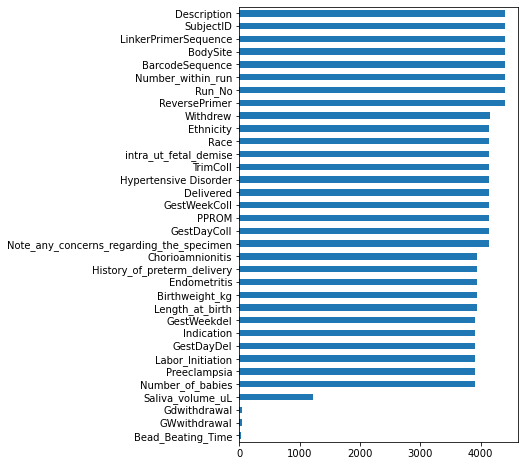

In [11]:
# look to see if there are any missing data. 
plt.figure(figsize = (5,8)) 
colcount = patientinfo.count().sort_values()
colcount.plot(kind = "barh") 

OTUId
OTU_1382       1
OTU_1853       1
OTU_1729       1
OTU_1610       1
OTU_1473       1
            ... 
OTU_900     2146
OTU_6       2179
OTU_11      2225
OTU_7       2391
OTU_1       2639
Length: 1896, dtype: int64


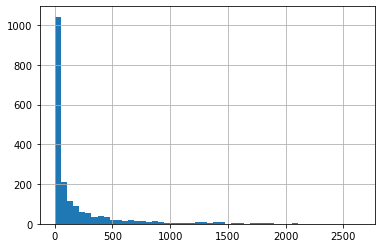

In [8]:
(data!=0).sum().sort_values().hist(bins = 50) 
print((data!=0).sum().sort_values()) # note some samples have only 1 OTU identified

In [9]:
# let's look at columns of patientinfo next 

# first look at type to see what we may need to encode
patientinfo.dtypes

BarcodeSequence                              object
LinkerPrimerSequence                         object
BodySite                                     object
SubjectID                                    object
GestDayColl                                 float64
GestWeekColl                                float64
TrimColl                                    float64
intra_ut_fetal_demise                        object
History_of_preterm_delivery                 float64
Withdrew                                     object
Gdwithdrawal                                float64
GWwithdrawal                                float64
Delivered                                    object
GestDayDel                                  float64
GestWeekdel                                 float64
Labor_Initiation                             object
Indication                                   object
PPROM                                        object
Chorioamnionitis                            float64
Endometritis

In [10]:
for col in patientinfo.columns:
    if patientinfo[col].dtype == object: 
        print(patientinfo[col].value_counts()) 
# my way of looking at all the object cols quickly. You can use excel too.

CGTCGATCTCTC    10
CCAGATGATCGT    10
CGCAGCGGTATA    10
CTCATGTACAGT    10
CGTACAGTTATC    10
                ..
TGGATATGCGCT     1
ACACGGTGTCTA     1
GCTGCTGCAATA     1
AGCTGACTAGTC     1
TAGGTATCTCAC     1
Name: BarcodeSequence, Length: 537, dtype: int64
GCACTCCTACGGGAGGCAGCA    4402
Name: LinkerPrimerSequence, dtype: int64
Vaginal_Swab          1072
Saliva                1033
Tooth_Gum              976
Stool                  887
mock                   213
NTC                     52
Back_of_ear_L           51
Back_of_ear_R           34
Urine                   34
Elbow_crease_R          29
Cord Blood (Serum)      21
Name: BodySite, dtype: int64
mock     213
10101    206
10023    166
10039    160
10022    156
10028    155
10046    153
10032    152
10034    151
10006    146
10044    139
10045    138
10018    137
10043    134
10047    130
19005    128
10040    122
10014    120
10021    117
10031    116
10001    115
10024    110
19004    108
10036     99
10025     98
10013     90
10008  

In [13]:
# for BodySite -- we want to combine some entries
bodysite_combine = ['Back_of_ear_L', 'Back_of_ear_R', 'Elbow_crease_R'] # this can be skin samples. 
patientinfo['BodySite']= patientinfo['BodySite'].apply(lambda x: 'Skin' if (x in bodysite_combine) else x)

In [12]:
# look at numeric cols
for col in patientinfo.columns:
    if patientinfo[col].dtype != object: 
        print(patientinfo[col].describe())

count     4137.000000
mean       352.240271
std       2474.009837
min        -74.000000
25%        128.000000
50%        190.000000
75%        248.000000
max      41360.000000
Name: GestDayColl, dtype: float64
count    4137.000000
mean       50.718153
std       353.433521
min        -9.000000
25%        19.000000
50%        27.000000
75%        36.000000
max      5909.000000
Name: GestWeekColl, dtype: float64
count    4137.00000
mean        2.53517
std         0.95462
min         0.00000
25%         2.00000
50%         3.00000
75%         3.00000
max         4.00000
Name: TrimColl, dtype: float64
count    3933.000000
mean        0.267480
std         0.442701
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: History_of_preterm_delivery, dtype: float64
count     53.000000
mean     164.339623
std       34.058176
min       72.000000
25%      173.000000
50%      173.000000
75%      173.000000
max      194.000000
Name: Gdwithdrawal

In [14]:
# quality check -- let's remove NTC and mock patients
patient_clean = patientinfo[~patientinfo['SubjectID'].isin(['mock','NTC'])]
patient_clean['SubjectID'].value_counts()

10101    206
10023    166
10039    160
10022    156
10028    155
10046    153
10032    152
10034    151
10006    146
10044    139
10045    138
10018    137
10043    134
10047    130
19005    128
10040    122
10014    120
10021    117
10031    116
10001    115
10024    110
19004    108
10036     99
10025     98
10013     90
10008     89
10055     85
10020     60
10003     53
10029     52
19007     45
10009     43
10017     42
19006     41
10002     40
10005     40
19009     38
10004     27
10007     26
19010     21
10016     19
10027     18
10012     16
19008     14
10015      7
10010      6
10011      4
19003      4
10035      1
Name: SubjectID, dtype: int64

In [15]:
# let's quickly look at patients that withdrew
display(patient_clean[patient_clean['Withdrew']=='T'])
display(patient_clean[patient_clean['Withdrew']=='T']['SubjectID'].unique())
# 3 patients, withdrew before 28 week of gestation. Not a lot of good data, we can remove them for now.
patient_clean = patient_clean[patient_clean['Withdrew']=='F']

,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,Gdwithdrawal,GWwithdrawal,Delivered,GestDayDel,GestWeekdel,Labor_Initiation,Indication,PPROM,Chorioamnionitis,Endometritis,Hypertensive Disorder,Preeclampsia,Birthweight_kg,Length_at_birth,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000201108,AACGCACGCTAG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,81.0,12.0,1.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,1,NaN,1
1000201118,AAGCTGCAGTCG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,86.0,13.0,1.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,5,NaN,5
1000201128,AATCAGTCTCGT,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,93.0,14.0,2.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,6,NaN,6
1001001098,ACACTGTTCATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10010,73.0,11.0,1.0,F,NaN,T,72.0,11.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,Black,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,patient log not filled out,run001,13,NaN,13
1000201138,ACAGCTAGCTTG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,103.0,15.0,2.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,17,NaN,17
1000201148,ACAGTTGCGCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,109.0,16.0,2.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,19,NaN,19
1000201168,ACGTCTGTAGCA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,124.0,18.0,2.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,41,NaN,41
1000201218,ACGTGAGAGAAT,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10002,160.0,23.0,2.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,42,NaN,42
1000204108,AGCAGTCGCGAT,GCACTCCTACGGGAGGCAGCA,Tooth_Gum,10002,81.0,12.0,1.0,F,NaN,T,173.0,25.0,F,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Patient did not complete a specimen log,run001,74,NaN,74


array(['10002', '10010', '10015'], dtype=object)

In [16]:
# With so many columns, easier to indicate what we want to keep: 
cols_prediction = ['BodySite', 'Race','Ethnicity','History_of_preterm_delivery'] # will need to one-hot encode
cols_prediction_num = ['GestDayColl','GestWeekColl','TrimColl'] # keep as is. 

# unnecessary columns, and columns without variance (e.g. same for every sample)
cols_unnecessary = ['BarcodeSequence', 'LinkerPrimerSequence', 'Bead_Beating_Time', 'Gdwithdrawal','GWwithdrawal',
                 'Withdrew','Endometritis',' Number_within_run','Description']
# these are columns I may possibly use for prediction
cols_predict = ['intra_ut_fetal_demise', 'Delivered', 'Labor_Initiation', 'PPROM', 'Hypertensive Disorder', 'Preeclampsia',
               'GestDayDel','GestWeekdel','Chorioamnionitis','Birthweight_kg','Length_at_birth','Number_of_babies'] # will need to encode
    # labor_intitiation of 0 seems to refer to birth week 36 or after
                     
# these are extra columns I want to consider
id_cols = ['SubjectID', 'Run_No','BodySite']
other_cols_consider = ['Withdrew', 'Labor_Initiation', 'Indication','Saliva_volume_uL','Note_any_concerns_regarding_the_specimen']
color_cols = ['GestDayDel', 'TrimColl','BodySite']

In [17]:
for col in cols_prediction:
    print(patient_clean[col].value_counts())
    print(patient_clean[['SubjectID',col]].drop_duplicates()[col].value_counts(dropna = False))
    print()
    
for col in cols_prediction_num:
    print(patient_clean[col].value_counts())
    print(patient_clean[['SubjectID',col]].drop_duplicates()[col].value_counts(dropna = False)) 
    print()
    
# from this some clea

Vaginal_Swab          1057
Saliva                1026
Tooth_Gum              969
Stool                  885
Skin                    97
Urine                   29
Cord Blood (Serum)      21
Name: BodySite, dtype: int64
Vaginal_Swab          46
Tooth_Gum             43
Saliva                43
Stool                 39
Cord Blood (Serum)    20
Skin                  12
Urine                 10
Name: BodySite, dtype: int64

White                    2647
Other (Specify below)     557
American Indian           194
Asian-Chinese             151
Pacific Islander          139
Indian                    122
Asian-Unspecified         120
Black                     114
Asian-Japanese             40
Name: Race, dtype: int64
White                    27
Other (Specify below)     6
Pacific Islander          3
American Indian           3
Black                     3
Asian-Unspecified         1
Indian                    1
Asian-Japanese            1
Asian-Chinese             1
Name: Race, dtype: int64

Non-

In [18]:
# for race, let us combine Asians, and assume Indian as part of the category (these categories may or may not also be worthwhile to put in 'other')
patient_clean['Race'].replace(['Indian', 'Asian-Chinese', 'Asian-Unspecified', 'Asian-Japanese'],'Asian',inplace = True)
print(patient_clean['Race'].value_counts())
# for ethnicity, let us assume the '0' is nonhispanic
patient_clean['Ethnicity'].replace('0', 'Non-hispanic', inplace = True)
print(patient_clean['Ethnicity'].value_counts())

# note History_of_preterm_delivery has nan. I will treat that as a separate category later.

White                    2647
Other (Specify below)     557
Asian                     433
American Indian           194
Pacific Islander          139
Black                     114
Name: Race, dtype: int64
Non-hispanic    2734
Hispanic        1350
Name: Ethnicity, dtype: int64


In [19]:
# There's that one weird large GestDayColl, let's look at it
patient_clean[patient_clean['GestDayColl']>1000]

# well I want to remove this patient too then.
patient_clean = patient_clean[patient_clean['GestDayColl']<1000]

In [20]:
# for each predicted outcome, let's see how much data we have.
for col in cols_predict:
    print(patient_clean[col].value_counts())
    print(patient_clean[['SubjectID',col]].drop_duplicates()[col].value_counts(dropna = False)) 
    print()
    
# Labor_Initiation has some nans -- will need to subset if we want to predict that. 
# Number_of_babies, pre-eclampsia, and delivery related stats. This may be from itraut fetal demise or preterm birth moms? we can check but will need to subset to predict

F    3975
T      94
Name: intra_ut_fetal_demise, dtype: int64
F    43
T     2
Name: intra_ut_fetal_demise, dtype: int64

T    3908
F     161
Name: Delivered, dtype: int64
T    40
F     4
Name: Delivered, dtype: int64

Induced                      1215
Spontaneous                   831
0                             722
Augmented                     654
SROM without contractions     486
Name: Labor_Initiation, dtype: int64
Induced                      12
Spontaneous                   9
Augmented                     9
0                             6
SROM without contractions     4
NaN                           4
Name: Labor_Initiation, dtype: int64

0      3077
No      687
Yes     305
Name: PPROM, dtype: int64
0      33
No      9
Yes     2
Name: PPROM, dtype: int64

None                             2798
Mild gestational hypertension     375
Severe Pre-eclampsia              373
Mild Pre-eclampsia                252
0                                 161
Chronic Hypertension              11

In [21]:
# there are some 0's we need to encode too. 
# Hypertensive Disorder -- 0 will be None.
patient_clean['Hypertensive Disorder'].replace('0','None', inplace = True)
print(patient_clean['Hypertensive Disorder'].value_counts())

# remove chorioamnitis from prediction list, only 1 patient has it.
cols_predict = ['intra_ut_fetal_demise', 'Delivered', 'PPROM', 'Hypertensive Disorder']
subset_to_predict = ['Labor_Initiation','Preeclampsia','GestDayDel','GestWeekdel','Birthweight_kg','Length_at_birth','Number_of_babies'] # subset to those who delivered

None                             2959
Mild gestational hypertension     375
Severe Pre-eclampsia              373
Mild Pre-eclampsia                252
Chronic Hypertension              110
Name: Hypertensive Disorder, dtype: int64


In [22]:
# let's look at the 161 NAs
temp = patient_clean[patient_clean['GestWeekdel'].isna()]
display(temp)
print(temp.SubjectID.value_counts()) # from 4 subjects. 

patient_clean[patient_clean['Delivered']=='F']['SubjectID'].value_counts() # All these patients are captured in the Delivered column. 


# As an extra, I looked to see why they may not have delivered
print(temp[['intra_ut_fetal_demise','SubjectID']].value_counts()) # 2 patients had intra ut fetal demise.
# Weirdly, Subject 10001 has both T and F for intra-uterine fetal demise... but will keep for now, perhaps these are at different times.
temp[temp['SubjectID'].isin(['10007','10012'])] # Subjects 10007 and 10012 did not deliver for reasons not given


,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,Gdwithdrawal,GWwithdrawal,Delivered,GestDayDel,GestWeekdel,Labor_Initiation,Indication,PPROM,Chorioamnionitis,Endometritis,Hypertensive Disorder,Preeclampsia,Birthweight_kg,Length_at_birth,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000101018,AACTGTGCGTAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-73.0,-9.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,3,NaN,3
1000101028,AAGAGATGTCGA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-65.0,-8.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,4,NaN,4
1000101038,ACAGACCACTCA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-59.0,-7.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,14,NaN,14
1000101048,ACAGAGTCGGCT,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-54.0,-6.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,blood on swab. pt assumed to be menstruating.\t,run001,15,NaN,15
1000101058,ACAGCAGTGGTC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10001,-44.0,-5.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,16,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000102168.rs,AGTAGTATCCTC,GCACTCCTACGGGAGGCAGCA,Stool,10001,32.0,5.0,1.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,71,NaN,4182
1000102078.rs,AGCATATGAGAG,GCACTCCTACGGGAGGCAGCA,Stool,10001,-32.0,-3.0,0.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run018,76,NaN,4187
1000103158.rs,CACGGACTATAC,GCACTCCTACGGGAGGCAGCA,Saliva,10001,24.0,4.0,1.0,T,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,500,0,run018,147,NaN,4258


10001    115
10007     26
10012     16
19003      4
Name: SubjectID, dtype: int64
intra_ut_fetal_demise  SubjectID
T                      10001        90
F                      10007        26
                       10001        25
                       10012        16
T                      19003         4
dtype: int64


,BarcodeSequence,LinkerPrimerSequence,BodySite,SubjectID,GestDayColl,GestWeekColl,TrimColl,intra_ut_fetal_demise,History_of_preterm_delivery,Withdrew,Gdwithdrawal,GWwithdrawal,Delivered,GestDayDel,GestWeekdel,Labor_Initiation,Indication,PPROM,Chorioamnionitis,Endometritis,Hypertensive Disorder,Preeclampsia,Birthweight_kg,Length_at_birth,Number_of_babies,Race,Ethnicity,ReversePrimer,Saliva_volume_uL,Note_any_concerns_regarding_the_specimen,Run_No,Number_within_run,Bead_Beating_Time,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000701088,ACCACATACATC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10007,71.0,10.0,1.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,24,NaN,24
1000701098,ACCAGACGATGC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10007,81.0,12.0,1.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,25,NaN,25
1001201198,ACGCAACTGCTA,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10012,134.0,20.0,2.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,Black,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,33,NaN,33
1001201208,ACGCGATACTGG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10012,140.0,20.0,2.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,Black,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,Specimen log not provided. Verified time with Pt.,run001,34,NaN,34
1000701118,ACTATTGTCACG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10007,96.0,14.0,2.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,48,NaN,48
1000701128,ACTCACGGTATG,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10007,98.0,14.0,2.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,White,Hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,49,NaN,49
1001201228,ACTTGTAGCAGC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10012,158.0,23.0,2.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,Black,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,59,NaN,59
1001201238,AGAACACGTCTC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10012,164.0,24.0,2.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,Black,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,60,NaN,60
1001201258,AGACCGTCAGAC,GCACTCCTACGGGAGGCAGCA,Vaginal_Swab,10012,180.0,26.0,2.0,F,NaN,F,NaN,NaN,F,NaN,NaN,NaN,NaN,0,NaN,NaN,None,NaN,NaN,NaN,NaN,Black,Non-hispanic,CGTATCGCCTCCCTCGCGCCATCAG,NaN,0,run001,61,NaN,61


# Done with filtering and observation. Now to encoding/feature engineering

In [23]:
# Whew, now let's create a column for preterm birth, and put 'na' for the nondeliveries for now.
def is_preterm(wks):
    if wks >=37: return 0
    elif wks < 37: return 1
    else: return np.nan

patient_clean['ispreterm'] = patient_clean['GestWeekdel'].apply(is_preterm)
display(patient_clean['ispreterm'].value_counts(dropna=False))
subset_to_predict.append('ispreterm')
subset_to_predict

0.0    3372
1.0     536
NaN     161
Name: ispreterm, dtype: int64

['Labor_Initiation',
 'Preeclampsia',
 'GestDayDel',
 'GestWeekdel',
 'Birthweight_kg',
 'Length_at_birth',
 'Number_of_babies',
 'ispreterm']

In [24]:
# whew... now that we are done looking at our data, let's encode our columns of interest
X = patient_clean[cols_prediction + cols_prediction_num]
display(X)


,BodySite,Race,Ethnicity,History_of_preterm_delivery,GestDayColl,GestWeekColl,TrimColl
#SampleID,,,,,,,
1000501278,Vaginal_Swab,Asian,Non-hispanic,0.0,188.0,27.0,3.0
1000101018,Vaginal_Swab,White,Non-hispanic,NaN,-73.0,-9.0,0.0
1000101028,Vaginal_Swab,White,Non-hispanic,NaN,-65.0,-8.0,0.0
1000301298,Vaginal_Swab,American Indian,Non-hispanic,1.0,198.0,29.0,3.0
1000301308,Vaginal_Swab,American Indian,Non-hispanic,1.0,205.0,30.0,3.0
...,...,...,...,...,...,...,...
1004604448.rs,Tooth_Gum,Other (Specify below),Non-hispanic,0.0,303.0,44.0,4.0
1010104488.rs,Tooth_Gum,White,Non-hispanic,1.0,311.0,45.0,4.0
1002402218.ca2.rs,Stool,White,Non-hispanic,0.0,150.0,22.0,2.0


Easiest way to one hot encode is using the [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function.

In [25]:
X = pd.get_dummies(X).fillna(0)
display(X) # sweet! one hot encoded

,History_of_preterm_delivery,GestDayColl,GestWeekColl,TrimColl,BodySite_Cord Blood (Serum),BodySite_Saliva,BodySite_Skin,BodySite_Stool,BodySite_Tooth_Gum,BodySite_Urine,BodySite_Vaginal_Swab,Race_American Indian,Race_Asian,Race_Black,Race_Other (Specify below),Race_Pacific Islander,Race_White,Ethnicity_Hispanic,Ethnicity_Non-hispanic
#SampleID,,,,,,,,,,,,,,,,,,,
1000501278,0.0,188.0,27.0,3.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1000101018,0.0,-73.0,-9.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1000101028,0.0,-65.0,-8.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1000301298,1.0,198.0,29.0,3.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
1000301308,1.0,205.0,30.0,3.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004604448.rs,0.0,303.0,44.0,4.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1010104488.rs,1.0,311.0,45.0,4.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1002402218.ca2.rs,0.0,150.0,22.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


Note: for encoding categories, you can also use pd.factorize
e.g.
```python
codes, race_label = pd.factorize(X['Race'])
X['Race']=codes
```

you can also use sklearn.preprocessing packages for encoding.

In [26]:
patient_clean[patient_clean['Labor_Initiation']=='Spontaneous'].GestWeekdel.value_counts()

40.0    318
39.0    134
37.0    130
41.0    117
35.0     90
30.0     38
36.0      4
Name: GestWeekdel, dtype: int64

In [27]:
y_predict = patient_clean[cols_predict]
for col in y_predict.columns:
    print(y_predict[col].value_counts(dropna=0))
# let's encode
htn_map = {'None':0, 'Chronic Hypertension':1, 'Mild gestational hypertension':2, 
           'Mild Pre-eclampsia':3, 'Severe Pre-eclampsia':4}
y_predict['intra_ut_fetal_demise']=y_predict['intra_ut_fetal_demise'].apply(lambda x: 1 if x=='T' else 0).astype(int)
y_predict['Delivered'] = y_predict['Delivered'].apply(lambda x: 1 if x=='T' else 0).astype(int)
y_predict['PPROM'] = y_predict['Delivered'].apply(lambda x: 1 if x=='T' else 0).astype(int)
y_predict['Hypertensive Disorder'] = y_predict['Hypertensive Disorder'].map(htn_map)
display(y_predict)
###
y_predict2 = patient_clean[subset_to_predict]
for col in y_predict2.columns:
    print(y_predict2[col].value_counts(dropna=False))
labor_map = {'Spontaneous':0, 'Induced':1,'Augmented':2,'SROM without contractions':3,'0':4}
y_predict2['Labor_Initiation'] = y_predict2['Labor_Initiation'].map(labor_map)
y_predict2['Preeclampsia'] = y_predict2['Preeclampsia'].apply(lambda x: 1 if x=='T' else 0).astype(int)
display(y_predict2)

F    3975
T      94
Name: intra_ut_fetal_demise, dtype: int64
T    3908
F     161
Name: Delivered, dtype: int64
0      3077
No      687
Yes     305
Name: PPROM, dtype: int64
None                             2959
Mild gestational hypertension     375
Severe Pre-eclampsia              373
Mild Pre-eclampsia                252
Chronic Hypertension              110
Name: Hypertensive Disorder, dtype: int64


/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,intra_ut_fetal_demise,Delivered,PPROM,Hypertensive Disorder
#SampleID,,,,
1000501278,0,1,0,2
1000101018,1,0,0,0
1000101028,1,0,0,0
1000301298,0,1,0,2
1000301308,0,1,0,2
...,...,...,...,...
1004604448.rs,0,1,0,0
1010104488.rs,0,1,0,0
1002402218.ca2.rs,0,1,0,1


Induced                      1215
Spontaneous                   831
0                             722
Augmented                     654
SROM without contractions     486
NaN                           161
Name: Labor_Initiation, dtype: int64
F      3283
T       625
NaN     161
Name: Preeclampsia, dtype: int64
276.00    413
279.00    341
258.00    305
278.00    280
275.00    167
NaN       161
283.00    151
277.00    137
269.00    136
253.00    127
273.00    122
280.00    120
272.00    118
209.00    112
262.00    105
282.00    102
288.00     96
251.00     95
268.00     88
284.00     79
264.00     79
244.00     75
255.00     75
260.00     53
151.00     44
281.00     43
263.00     42
211.00     37
254.00     37
274.00     27
259.00     18
276.93     15
282.15     15
268.65     15
243.88     15
275.50     14
278.17     14
275.62     13
273.46     12
288.22     12
258.02     12
277.91     11
279.75     10
283.82     10
252.69     10
254.97     10
267.95     10
283.21      9
275.06      9
257.

/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/atang2/anaconda3/envs/deepehr/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Labor_Initiation,Preeclampsia,GestDayDel,GestWeekdel,Birthweight_kg,Length_at_birth,Number_of_babies,ispreterm
#SampleID,,,,,,,,
1000501278,2.0,0,279.00,40.0,3.29,53.0,1.0,0.0
1000101018,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1000101028,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1000301298,1.0,0,260.00,38.0,3.26,48.0,1.0,0.0
1000301308,1.0,0,260.00,38.0,3.26,48.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1004604448.rs,4.0,0,275.50,40.0,3.67,52.0,1.0,0.0
1010104488.rs,3.0,0,258.02,37.0,2.78,49.5,1.0,0.0
1002402218.ca2.rs,1.0,0,261.99,38.0,2.57,47.0,1.0,0.0


In [28]:
X = X.merge(data, left_index = True, right_index = True)

In [29]:
OTU_cols = X.columns[X.columns.str.startswith('OTU')]

In [30]:
# now compute features from our OTU data
OTU_cols = X.columns[X.columns.str.startswith('OTU')]
X['OTU_of_max']=data.idxmax(axis=1).apply(lambda x: x.split('_')[-1]).astype(int) # get OTU associated with max number
X['sum_OTU'] = data.sum(axis=1)
X['std_OTU'] = data.sum(axis=1)
X['avg_OTU'] = data.sum(axis=1)
X['median_OTU'] = data.median(axis=1)
X['skew_OTU'] = data.skew(axis=1)
X['unique_OTU'] = (data>0).sum(axis=1)

In [31]:
(data>0).sum().sort_values()[-100:]
# Let's see if there is co-occurence between OTU_1, OTU_7, OTU_11, OTU_6, OTU_13, OTU_1452
OTU_co = [1,7,11,6,13,1452]
for i in OTU_co:
    for j in OTU_co: 
        X['coOTU_{}_{}'.format(i,j)] = X['OTU_{}'.format(i)] + X['OTU_{}'.format(j)]

In [68]:
# I also just found this to compute diversity http://scikit-bio.org/docs/0.1.3/math.diversity.alpha.html
import skbio.diversity.alpha as alpha
X['Shannon_entropy']=data.apply(alpha.shannon, axis=1)# shannon entropy
X['gini_index'] = data.apply(alpha.gini_index, axis = 1) # Gini index
X['dominance']=data.apply(alpha.dominance, axis=1)# dominance
X['brillouin_d'] = data.apply(alpha.brillouin_d, axis=1) # brillouin_d
X['chao1'] = data.apply(alpha.chao1, axis=1) #chao1 richness estimator
X['simpson'] = data.apply(alpha.simpson, axis=1)# Simpson's index
X['singles'] = data.apply(alpha.singles, axis=1) # single occurences
X['doubles'] = data.apply(alpha.doubles, axis=1) # double occurences

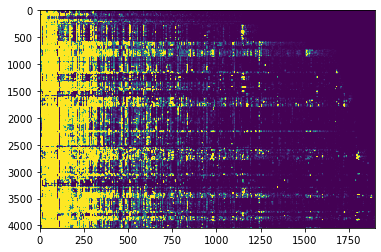

In [71]:
plt.imshow(X[OTU_cols], aspect = 'auto', vmax = 1, vmin = 0)

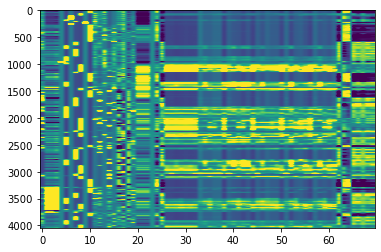

In [103]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler().fit((X.loc[:,~X.columns.isin(OTU_cols)].to_numpy()))
plt.imshow(S.transform(X.loc[:,~X.columns.isin(OTU_cols)]), aspect = 'auto', vmax = 1, vmin = -1)

In [110]:
X.to_csv('Data/X_processed.csv')

In [108]:
y_predict = y_predict.loc[X.index]
y_predict2 = y_predict2.loc[X.index]

In [111]:
y_predict.to_csv('Data/y_processed.csv')
y_predict2.to_csv('Data/y2_processed.csv')